In [1]:
# export PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0
import os
import time
import numpy as np
import torch
import random
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
# from tqdm import trange

# Checks for the availability of GPU 
if torch.backends.mps.is_available():
    device = 'mps'
    print("Working on Mac GPU")
elif torch.cuda.is_available():
    print("working on gpu!")
    device = 'cuda'
else:
    print("No gpu! only cpu ;)")
    device = 'cpu'
    

if device == 'cpu':    
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
elif device == 'cuda':
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
    torch.cuda.manual_seed_all(0)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = '0'


Working on Mac GPU


In [2]:
import torchvision
import torchvision.transforms as transforms
import os

if not os.path.isdir('./data'):
    os.mkdir('./data')
root = './data/'

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize([0.5], [0.5]),
                             ])

training_data = torchvision.datasets.FashionMNIST(root, train=True, transform=transform,download=True)
testing_data = torchvision.datasets.FashionMNIST(root, train=False, transform=transform,download=True)

num_train = len(training_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_bs = 16
test_bs = 16

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(training_data, batch_size=train_bs,
    sampler=train_sampler, drop_last=False)
valid_loader = torch.utils.data.DataLoader(training_data, batch_size=train_bs, 
    sampler=valid_sampler, drop_last=False)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=test_bs, 
    drop_last=False)


torch.Size([16, 1, 28, 28])


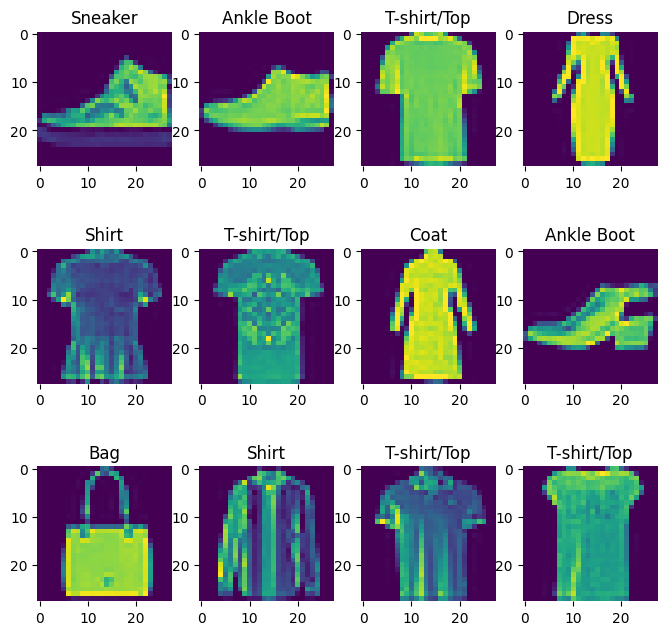

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## get a batch of data
images, labels = next(iter(train_loader))


image_dict = {0:'T-shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress',
              4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker',
              8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8))

print(images.size())

for i in np.arange(1, 13):
    ax = fig.add_subplot(3,4,i, frameon=False)
    img = images[i][0]
    ax.set_title(image_dict[labels[i].item()])
    plt.imshow(img)


In [4]:
import torch.nn as nn
class Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Model, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1, stride = 1)
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1, stride = 1)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride = 1)
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(3*3*64, num_classes)         
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu1(x)
        x = self.max_pool1(x)        
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.relu2(x)
        x = self.max_pool2(x)        
        x = self.conv3(x)
        x = self.batch_norm3(x)
        x = self.relu3(x)
        x = self.max_pool3(x)        
        x = self.flatten(x)
        x = self.fc1(x)
        return x    
    def flatten(self, x):
        N, C, H, W = x.size()
        x = x.view(N, C*H*W)
        return x
              
    

In [5]:
import torch.nn as nn
class My_Model(nn.Module):
    def __init__(self, num_classes):
        super(My_Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * 32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [6]:
## Run the cell to check the implementation of your model
model = My_Model(num_classes=10)
test_input = torch.randn(16,1,28,28)
out = model(test_input)
test_input2 = torch.rand(16,1,28,28)
out2 = model(test_input2)



In [7]:
## Hyperparameters for training the model.

learning_rate = 0.0001
epochs = 7
number_of_classes = 10

In [8]:
## First we will define an instance of the model to train
model = My_Model(num_classes=number_of_classes)
model = model.to(device)

# define the loss
# YOUR CODE HERE
# raise NotImplementedError()
# criterion = None
criterion = nn.CrossEntropyLoss();

# optimizer for the model, here we use Adam optimizer with a learning rate=0.001, momentum as 0.9
# and nesterov True.  
# YOUR CODE HERE
# raise NotImplementedError()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), amsgrad = True);

# optimizer = None

In [9]:
out = torch.FloatTensor([[0.1,0.8,0.05,0.05]])
true = torch.LongTensor([1])
assert criterion(out, true), 0.8925

In [10]:
criterion(out, true)

tensor(0.8925)

In [11]:
def train_model(epochs=25, validate=True):  
    train_loss = []
    val_loss = []
    for epoch in range(epochs):
        # Iterate through the batches in the data
        training_loss = 0.0
        validation_loss = 0.0
        model.train()
        for (images,labels)  in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            training_loss = training_loss + loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
        train_loss.append((training_loss/len(train_idx)).cpu().detach().numpy())
        print('train loss', training_loss/len(train_idx))        
        # if validate == True:
        #   # print("validation")
        model.eval()
        model.train(False)
        for (images,labels)  in valid_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          validation_loss = validation_loss + loss
        val_loss.append((validation_loss/len(valid_idx)).cpu().detach().numpy())
        print("Validation loss ",validation_loss/len(valid_idx))               
    return model, train_loss, val_loss
                

In [12]:
start = time.time()
trained_model, train_loss, val_loss = train_model(epochs, validate=True)
end = time.time()
print(end - start)

train loss tensor(0.0311, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0229, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0205, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0205, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0179, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0199, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0164, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0185, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0153, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0182, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0144, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0174, device='mps:0', grad_fn=<DivBackward0>)
train loss tensor(0.0137, device='mps:0', grad_fn=<DivBackward0>)
Validation loss  tensor(0.0171, device='mps:0', grad_fn=<DivBackward0>)
144.85974097251892


In [13]:
torch.__version__

'2.0.0'

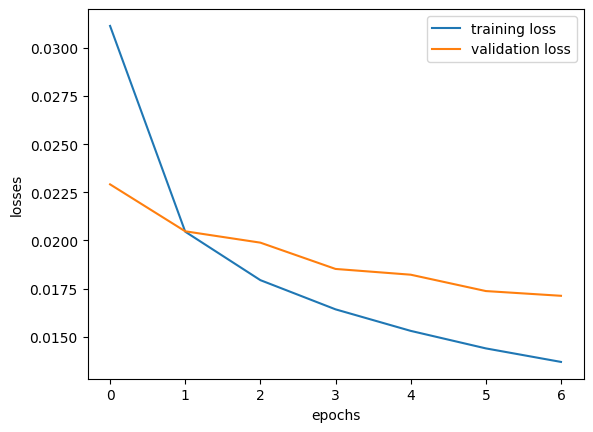

In [16]:
# Plot the losses
it = np.arange(epochs)
plt.plot(it, train_loss, label='training loss')
plt.plot(it, val_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(loc='upper right')
plt.show()

In [17]:
## Testing Loop

def test_model(model):
    '''
    A function to test the trained model on the test dataset and print the accuracy.
    
    Inputs:
        model: Trained model.
        
    outputs:
        None. Prints the accuracy.
    '''
    model.eval()
    with torch.no_grad():
        correct = 0.0
        total_samples = 0.0
        for images, labels in test_loader:
            
            # YOUR CODE HERE
#             raise NotImplementedError()
            '''
            YOUR CODE HERE
            '''
            ## Move the images to the device
            images = images.to(device)

            ## Move the labels to the device
            labels = labels.to(device)

            ## Get the output of the model by passing images as input to the model
            outputs = model(images)

            ## convert the outputs to a probability distribution using softmax and 
            softmax= nn.Softmax(dim=1)
            outputs = softmax(outputs)

            ## find the prediction with maximum probability
            predicted = torch.argmax(outputs,dim=1)

            ## compare predictions with ground truth for number of correct samples
            correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        
        accuracy = (correct/total_samples)*100
        print("Total Accuracy on the Test set: {} %".format(accuracy))
        return accuracy
    
        
test_model(model)
    

Total Accuracy on the Test set: 90.01 %


90.01